In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../Data/usgs_nwis_01626000_1952-10-01.csv',
                 parse_dates=[0],
                 na_values=[-999999])
df.datetime = pd.to_datetime(df.datetime).dt.tz_localize(None)
df = df.set_index('datetime')
df.head()

,site_no,00060_Mean,00060_Mean_cd
datetime,,,
1952-10-01,1626000,38.0,A
1952-10-02,1626000,39.0,A
1952-10-03,1626000,39.0,A
1952-10-04,1626000,38.0,A
1952-10-05,1626000,38.0,A


In [4]:
colunms_to_keep = ['00060_Mean', '00060_Mean_cd']
df = df[colunms_to_keep]
df.head()	

,00060_Mean,00060_Mean_cd
datetime,,
1952-10-01,38.0,A
1952-10-02,39.0,A
1952-10-03,39.0,A
1952-10-04,38.0,A
1952-10-05,38.0,A


In [5]:
df.iloc[:,1:].value_counts()

00060_Mean_cd
A                25814
A, e               507
P                  481
P, Ice               3
Name: count, dtype: int64

In [6]:
df.describe()

,00060_Mean
count,26802.000000
mean,149.751936
std,263.541643
min,15.700000
25%,44.000000
50%,83.000000
75%,164.000000
max,9670.000000


<Axes: xlabel='datetime'>

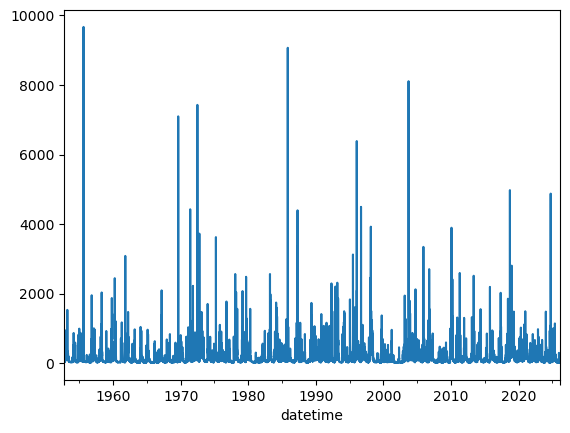

In [7]:
import matplotlib.pyplot as plt
df['00060_Mean'].plot(kind='line')

In [8]:
df_annual_max = df.resample('AS').max()
df_annual_max.head()
#df_annual_max.info()

C:\Users\gerkentx\AppData\Local\Temp\ipykernel_24336\2052001929.py:1: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  df_annual_max = df.resample('AS').max()


,00060_Mean,00060_Mean_cd
datetime,,
1952-01-01,950.0,A
1953-01-01,1540.0,A
1954-01-01,1000.0,A
1955-01-01,9670.0,A
1956-01-01,1960.0,A


<Axes: ylabel='Frequency'>

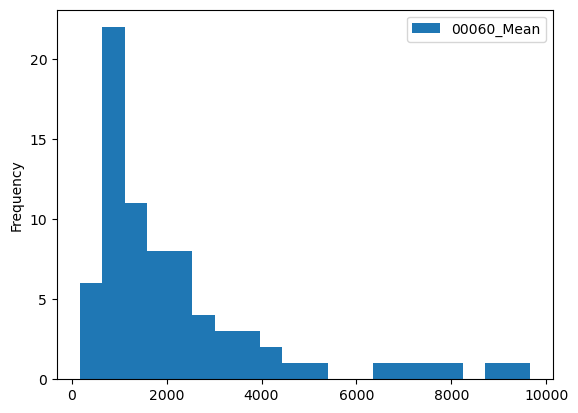

In [9]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
df_annual_max.plot(kind='hist', y = '00060_Mean', bins = 20, ax = ax)
#ax.xaxis.set_major_locator(mdates.YearLocator(base=10))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [10]:

sorted_data = df_annual_max.sort_values(by = '00060_Mean')
n = len(sorted_data)
sorted_data.insert(0, 'rank', range(1, 1 + n)) 
sorted_data['probability'] = (n - sorted_data["rank"] + 1) / (n + 1)
sorted_data['return_years'] = 1/sorted_data['probability']
sorted_data

,rank,00060_Mean,00060_Mean_cd,probability,return_years
datetime,,,,,
2026-01-01,1,165.0,"P, Ice",0.986842,1.013333
1981-01-01,2,312.0,A,0.973684,1.027027
2002-01-01,3,464.0,"A, e",0.960526,1.041096
2008-01-01,4,483.0,A,0.947368,1.055556
2000-01-01,5,556.0,"A, e",0.934211,1.070423
...,...,...,...,...,...
1969-01-01,71,7100.0,A,0.065789,15.200000
1972-01-01,72,7430.0,A,0.052632,19.000000
2003-01-01,73,8110.0,"A, e",0.039474,25.333333


<Axes: xlabel='00060_Mean', ylabel='probability'>

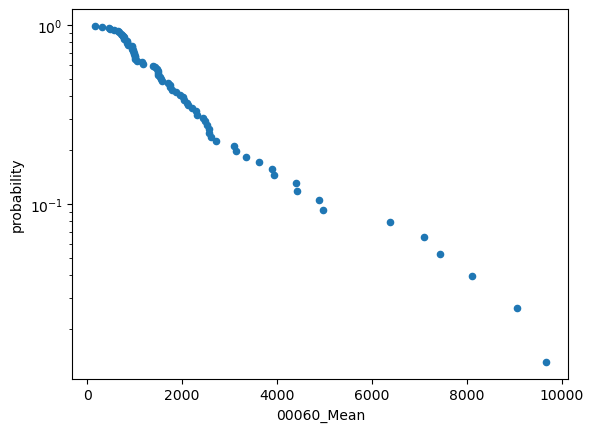

In [11]:
sorted_data.plot(kind='scatter',x='00060_Mean', y='probability',logy=True,)

<Axes: xlabel='return_years', ylabel='00060_Mean'>

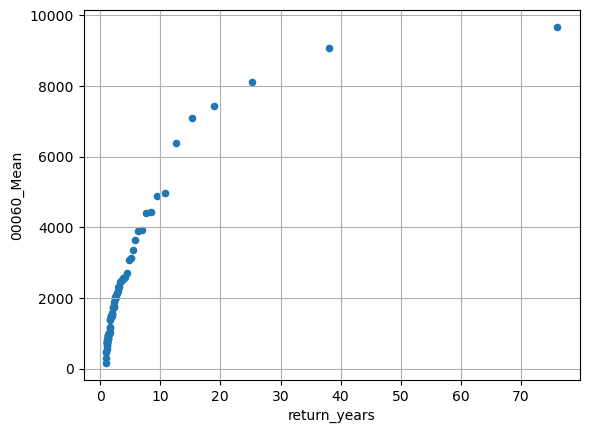

In [12]:
sorted_data.plot(kind='scatter',y='00060_Mean', x='return_years', grid = True)

In [13]:
#Log-Pearson Type III Distribution Fitting Procedure
# https://www.txdot.gov/manuals/des/hyd/chapter-4--hydrology/section-9--statistical-analysis-of-stream-gauge-da/log-pearson-type-iii-distribution-fitting-procedur.html

import numpy as np
sorted_data['log_discharge'] = np.log10(sorted_data['00060_Mean'])

In [17]:
from scipy.stats import pearson3

param = pearson3.fit(sorted_data['log_discharge'])
param

(0.07705260123416785, 3.2140237605029798, 0.3451237739859282)

In [15]:
# gumbel Dist
# p = exp(-exp(-((x-u)/alpha)))
# u = x_bar - 0.5772*alpha
# alpha = sqrt(6)*sigma/pi()

In [25]:
sorted_data['p_logPearson3']=(1-pearson3.cdf(sorted_data['log_discharge'], param[0], param[1], param[2]))
sorted_data

,rank,00060_Mean,00060_Mean_cd,probability,return_years,log_discharge,p_logPearson3
datetime,,,,,,,
2026-01-01,1,165.0,"P, Ice",0.986842,1.013333,2.217484,0.998601
1981-01-01,2,312.0,A,0.973684,1.027027,2.494155,0.983478
2002-01-01,3,464.0,"A, e",0.960526,1.041096,2.666518,0.945975
2008-01-01,4,483.0,A,0.947368,1.055556,2.683947,0.939953
2000-01-01,5,556.0,"A, e",0.934211,1.070423,2.745075,0.914711
...,...,...,...,...,...,...,...
1969-01-01,71,7100.0,A,0.065789,15.200000,3.851258,0.034600
1972-01-01,72,7430.0,A,0.052632,19.000000,3.870989,0.030625
2003-01-01,73,8110.0,"A, e",0.039474,25.333333,3.909021,0.024039


In [ ]:
sorted_data.plot()

,rank,00060_Mean,00060_Mean_cd,probability,return_years,log_discharge
datetime,,,,,,
2026-01-01,1,165.0,"P, Ice",0.986842,1.013333,2.217484
1981-01-01,2,312.0,A,0.973684,1.027027,2.494155
2002-01-01,3,464.0,"A, e",0.960526,1.041096,2.666518
2008-01-01,4,483.0,A,0.947368,1.055556,2.683947
2000-01-01,5,556.0,"A, e",0.934211,1.070423,2.745075
...,...,...,...,...,...,...
1969-01-01,71,7100.0,A,0.065789,15.200000,3.851258
1972-01-01,72,7430.0,A,0.052632,19.000000,3.870989
2003-01-01,73,8110.0,"A, e",0.039474,25.333333,3.909021


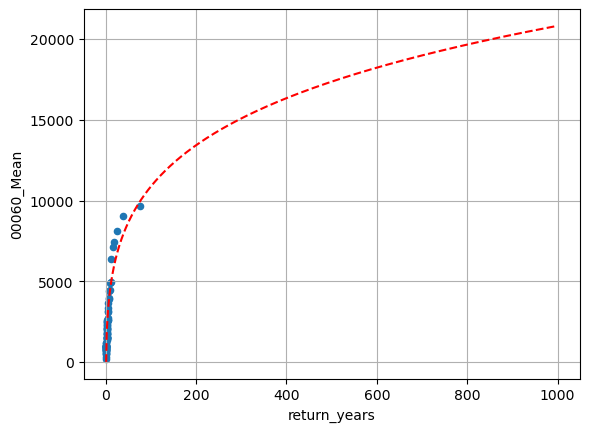

In [34]:
return_years = np.arange(1,1000,1)

fix, ax = plt.subplots()
sorted_data.plot(kind='scatter',y='00060_Mean', x='return_years', grid = True, ax=ax)

discharge = 10**(pearson3.isf(1/return_years,param[0], param[1], param[2]))

ax.plot(return_years, discharge, 'r--')
